# cp_opt demo

In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from pprint import pprint
import itertools

import cp
import base

# Toy data set

## Load and generate data

In [2]:
data = loadmat('datasets/toydata.mat')
A = np.array(data["A"])
B = np.array(data["B"])
C = np.array([[1,1],[3,2]])

XX = base.ktensor(A,B,C)

## Find parafac decomposition with cp_opt

In [3]:
factors, result,_ = cp.cp_opt(XX, rank=2, init='random', gtol=1e-15)

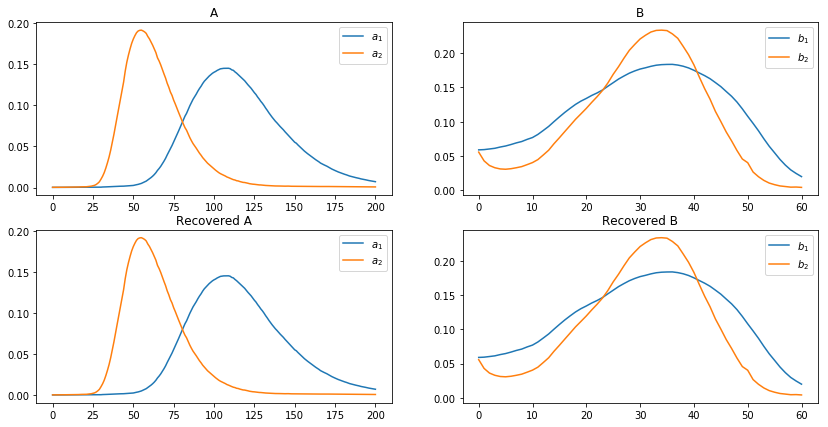

In [4]:
factors, sign, norms = cp.prepare_for_comparison(factors)
fig, axes = plt.subplots(2,2,figsize=(14,7))
axes[0,0].plot(A)
axes[0,1].plot(B)

axes[0,0].set_title("A")
axes[0,1].set_title("B")
axes[0,0].legend(["$a_1$", "$a_2$"])
axes[0,1].legend(["$b_1$", "$b_2$"])

axes[1,0].plot(factors[0])
axes[1,1].plot(factors[1]) 

axes[1,0].set_title("Recovered A")
axes[1,1].set_title("Recovered B")
axes[1,0].legend(["$a_1$", "$a_2$"])
axes[1,1].legend(["$b_1$", "$b_2$"])
plt.show()

# Aminoacid dataset

## Load data

In [5]:
X = loadmat('datasets/aminoacids.mat')['X'][0][0]['data']
X = X/np.linalg.norm(X)

## Find parafac decomposition with cp_opt

In [6]:
factors, result, initial_factors = cp.cp_opt(X, rank=3, init='svd', gtol=1e-5)

In [7]:
print(result.message)
print(f'F(x): { 0.0003137312420869495}')
print(f'Number of iterations: {result.nit}')
print(f'Number of function evaluations: {result.nfev}')

Optimization terminated successfully.
F(x): 0.0003137312420869495
Number of iterations: 104
Number of function evaluations: 192


In [8]:
print(result)

     fun: 0.00031371651010059595
     jac: array([-9.66757343e-07,  2.17060243e-06, -1.90915908e-06, -2.94966275e-06,
       -1.89287880e-06, -3.24481574e-06, -7.91356058e-06, -9.44525792e-06,
        5.28511640e-06, -3.38809107e-06, -2.29687494e-06,  6.67679118e-07,
       -5.01947528e-06, -5.56443361e-06, -2.89479725e-06, -2.05979734e-07,
       -1.56998197e-08, -4.45029040e-08, -2.06004721e-07, -1.68800704e-08,
       -4.38531823e-08, -2.14972441e-07, -1.41801877e-08, -4.69516261e-08,
       -1.88578642e-07, -1.03667519e-08, -4.20917667e-08, -1.94959340e-07,
       -1.23798849e-08, -4.28898644e-08, -1.90916688e-07, -1.23732201e-08,
       -3.98931423e-08, -2.05267610e-07, -1.36485429e-08, -4.10119527e-08,
       -1.73831232e-07, -1.37397102e-08, -3.24762514e-08, -1.85839501e-07,
       -2.15652608e-08, -2.91048506e-08, -2.55308204e-07, -3.71492017e-08,
       -3.57380973e-08, -2.49618938e-07, -5.06637531e-08, -2.40387268e-08,
       -3.00273014e-07, -7.84593786e-08, -1.60529196e-08,

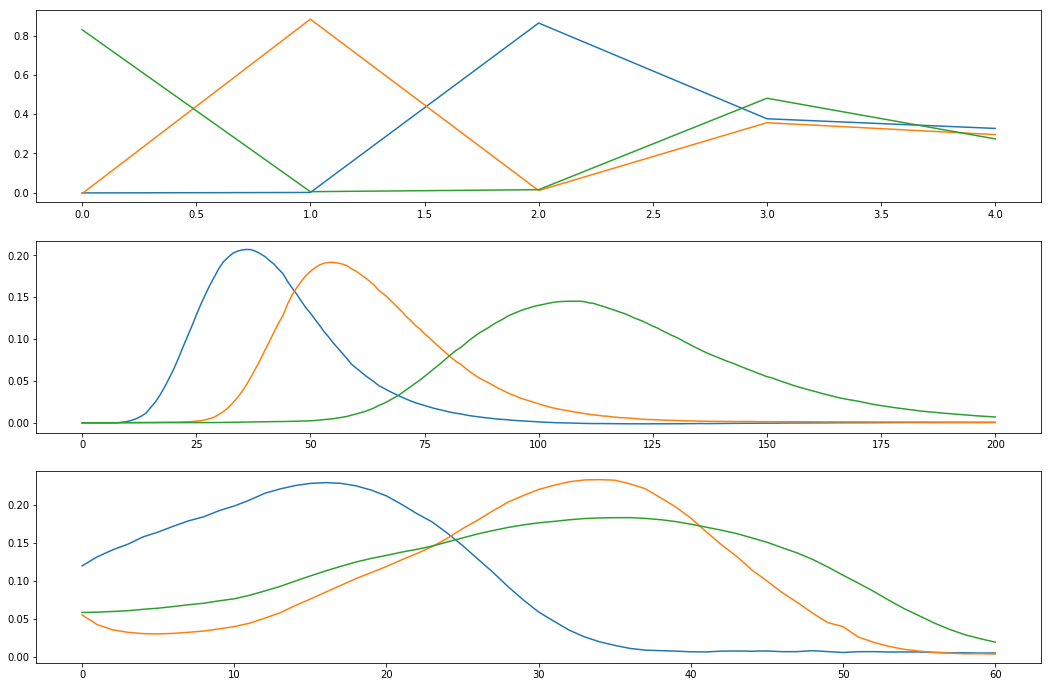

In [9]:
factors, sign, norms = cp.prepare_for_comparison(factors)
fig, axes = plt.subplots(3,1, figsize=(18,12))
for i in range(3):
    axes[i].plot(factors[i])
plt.show()

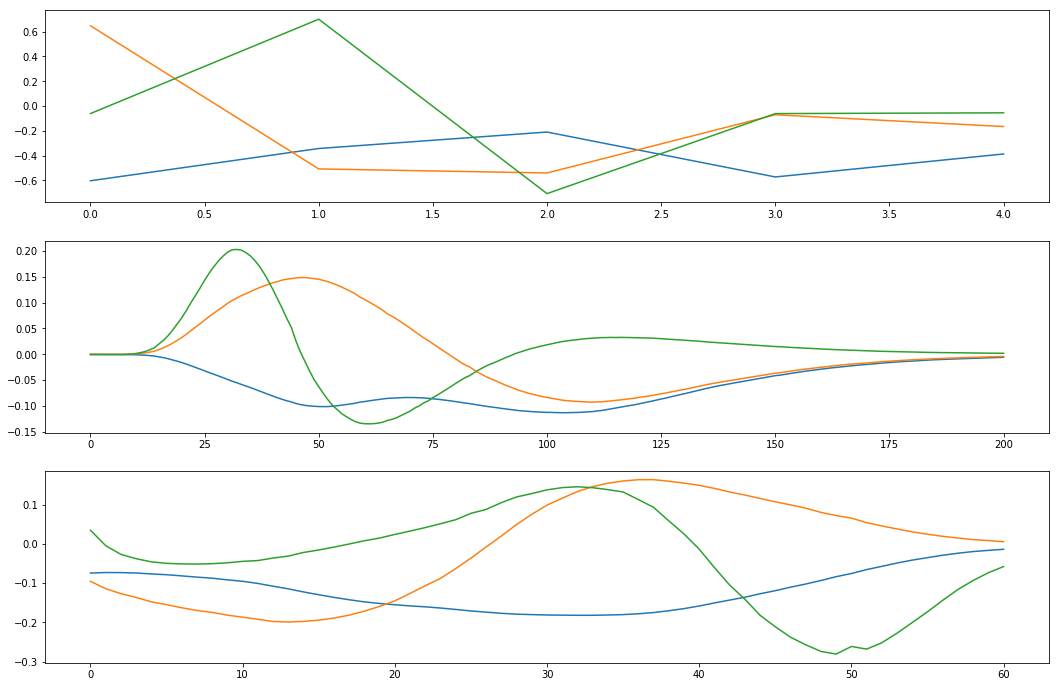

In [10]:
fig, axes = plt.subplots(3,1, figsize=(18,12))
for i in range(3):
    axes[i].plot(initial_factors[i])
plt.show()

## What happens when we look for wrong amount of  factors?

In [ ]:
rank_list = [2,3,4]

fig, axes = plt.subplots(len(rank_list), 3, figsize=(18,12))
    
for i, rank in enumerate(rank_list):
    factors_unnorm, result,_ = cp.cp_opt(X, rank=rank, init='svd', gtol=1e-10)
    factors, sign, norms = cp.prepare_for_comparison(factors_unnorm)
    for j in range(3):
        axes[i][j].plot(factors[j])
        
plt.show()

## We can look at the weights of each component in the four component model

In [ ]:
weights = np.prod(norms,axis=0).squeeze()

for i,w in enumerate(weights):
    print(f'Component {i:d} has weight {w:.2f}')